# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [21]:
# function that takes raw data and completes all preprocessing required before model fits

def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())
    

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 25, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [30]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/asadakhan/Documents/Study/ml_22/week05/moviereviews_train.tsv', my_random_seed=65)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 33554432)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           

# Multiple comparisons of different values for alpha parameter of the Ridge Regression Classifier

### MODEL: Ridge Regression Classifier

In [80]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=1)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 9903, 'TN': 10097, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


In [54]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=100)
rdg.fit(X_train, y_train)

rdg_performance_train1 = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train1')
rdg_performance_train1.compute_measures()
print(rdg_performance_train1.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 9903, 'TN': 10097, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train1'}


In [55]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=5000)
rdg.fit(X_train, y_train)

rdg_performance_train2 = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train2')
rdg_performance_train2.compute_measures()
print(rdg_performance_train2.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 9903, 'TN': 10097, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train2'}


In [56]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=25000)
rdg.fit(X_train, y_train)

rdg_performance_train3 = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train3')
rdg_performance_train3.compute_measures()
print(rdg_performance_train3.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 9883, 'TN': 10085, 'FP': 12, 'FN': 20, 'Accuracy': 0.9984, 'Precision': 0.9987872662961091, 'Recall': 0.9979804099767747, 'desc': 'rdg_train3'}


In [57]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=50000)
rdg.fit(X_train, y_train)

rdg_performance_train4 = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train4')
rdg_performance_train4.compute_measures()
print(rdg_performance_train4.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 9851, 'TN': 10075, 'FP': 22, 'FN': 52, 'Accuracy': 0.9963, 'Precision': 0.9977717005975894, 'Recall': 0.9947490659396142, 'desc': 'rdg_train4'}


In [58]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=500000)
rdg.fit(X_train, y_train)

rdg_performance_train5 = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train5')
rdg_performance_train5.compute_measures()
print(rdg_performance_train5.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 9527, 'TN': 9928, 'FP': 169, 'FN': 376, 'Accuracy': 0.97275, 'Precision': 0.9825701320132013, 'Recall': 0.9620317075633646, 'desc': 'rdg_train5'}


In [59]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=5000000)
rdg.fit(X_train, y_train)

rdg_performance_train6 = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train6')
rdg_performance_train6.compute_measures()
print(rdg_performance_train6.performance_measures)

{'Pos': 9903, 'Neg': 10097, 'TP': 8575, 'TN': 9985, 'FP': 112, 'FN': 1328, 'Accuracy': 0.928, 'Precision': 0.9871071716357775, 'Recall': 0.865899222457841, 'desc': 'rdg_train6'}


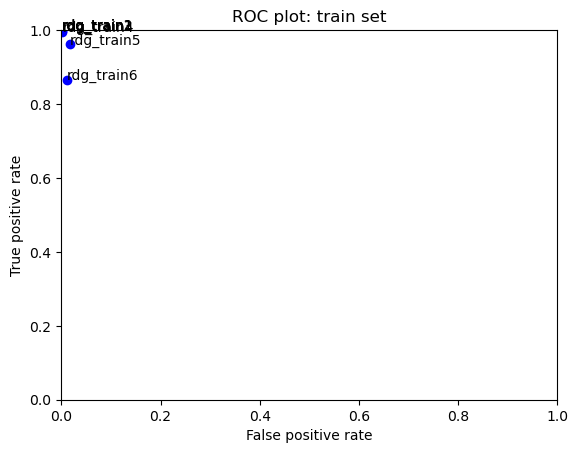

In [61]:
fits = [rdg_performance_train, rdg_performance_train1,
        rdg_performance_train2,
        rdg_performance_train3,
        rdg_performance_train4,
        rdg_performance_train5,
        rdg_performance_train6
       ]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: train set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: Ridge Regression Classifier

In [81]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 2190, 'TN': 1977, 'FP': 426, 'FN': 407, 'Accuracy': 0.8334, 'Precision': 0.8371559633027523, 'Recall': 0.8432807085098191, 'desc': 'rdg_test'}


In [90]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=100)
rdg.fit(X_train, y_train)

rdg_performance_test1 = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test1')
rdg_performance_test1.compute_measures()
print(rdg_performance_test1.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 2196, 'TN': 1981, 'FP': 422, 'FN': 401, 'Accuracy': 0.8354, 'Precision': 0.8388082505729565, 'Recall': 0.8455910666153253, 'desc': 'rdg_test1'}


In [91]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=5000)
rdg.fit(X_train, y_train)

rdg_performance_test2 = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test2')
rdg_performance_test2.compute_measures()
print(rdg_performance_test2.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 2289, 'TN': 2064, 'FP': 339, 'FN': 308, 'Accuracy': 0.8706, 'Precision': 0.8710045662100456, 'Recall': 0.8814016172506739, 'desc': 'rdg_test2'}


In [92]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=25000)
rdg.fit(X_train, y_train)

rdg_performance_test3 = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test3')
rdg_performance_test3.compute_measures()
print(rdg_performance_test3.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 2342, 'TN': 2112, 'FP': 291, 'FN': 255, 'Accuracy': 0.8908, 'Precision': 0.8894796809722749, 'Recall': 0.9018097805159799, 'desc': 'rdg_test3'}


In [93]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=50000)
rdg.fit(X_train, y_train)

rdg_performance_test4 = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test4')
rdg_performance_test4.compute_measures()
print(rdg_performance_test4.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 2341, 'TN': 2126, 'FP': 277, 'FN': 256, 'Accuracy': 0.8934, 'Precision': 0.8941940412528648, 'Recall': 0.9014247208317289, 'desc': 'rdg_test4'}


In [94]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=500000)
rdg.fit(X_train, y_train)

rdg_performance_test5 = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test5')
rdg_performance_test5.compute_measures()
print(rdg_performance_test5.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 2258, 'TN': 2133, 'FP': 270, 'FN': 339, 'Accuracy': 0.8782, 'Precision': 0.8931962025316456, 'Recall': 0.869464767038891, 'desc': 'rdg_test5'}


In [95]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=5000000)
rdg.fit(X_train, y_train)

rdg_performance_test6 = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test6')
rdg_performance_test6.compute_measures()
print(rdg_performance_test6.performance_measures)

{'Pos': 2597, 'Neg': 2403, 'TP': 1874, 'TN': 2273, 'FP': 130, 'FN': 723, 'Accuracy': 0.8294, 'Precision': 0.935129740518962, 'Recall': 0.7216018482864844, 'desc': 'rdg_test6'}


### ROC plot to compare performance of various models and fits

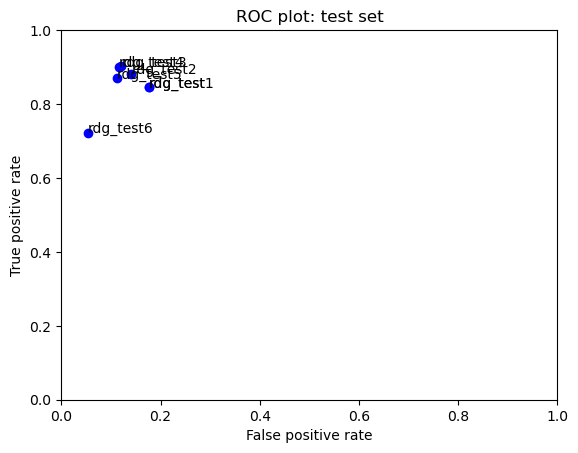

In [96]:
fits = [rdg_performance_test,
        rdg_performance_test1,
        rdg_performance_test2,
        rdg_performance_test3,
        rdg_performance_test4,
        rdg_performance_test5,
        rdg_performance_test6]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [36]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/Users/asadakhan/Documents/Study/ml_22/week05/moviereviews_test.tsv', my_random_seed=65, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [37]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.54192


In [38]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [39]:
my_submission.head()

,id,prediction
0,12311_10,0
1,8348_2,1
2,5828_4,1
3,7186_2,1
4,12128_7,0


In [40]:
my_submission.shape

(25000, 2)

In [41]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/asadakhan/Documents/Study/ml_22/week05/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation